# A.1

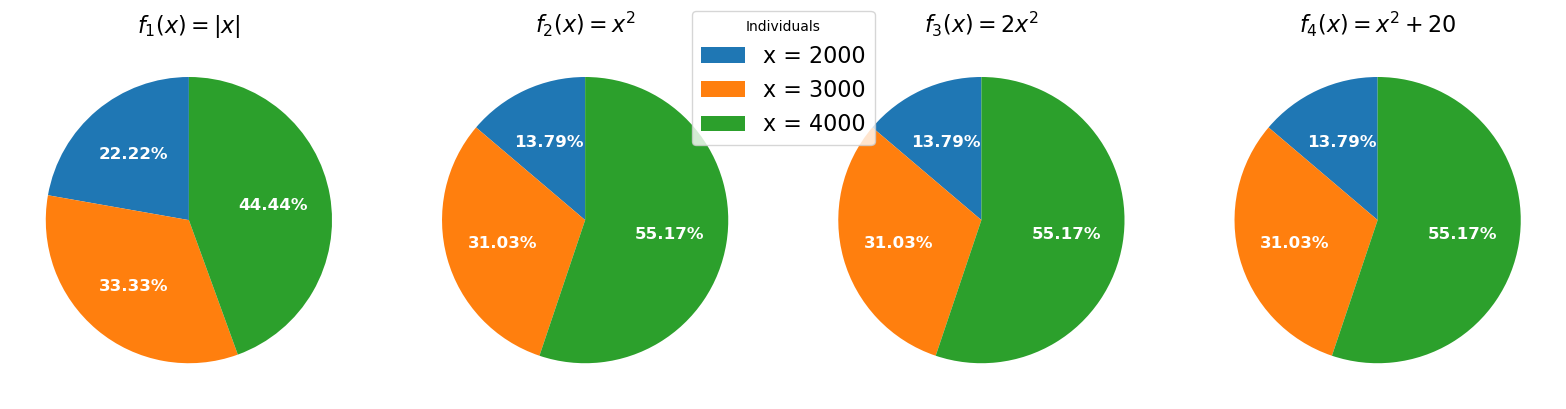

In [55]:
import matplotlib.pyplot as plt

# Data for selection probabilities for each fitness function
selection_probabilities = [
    # f1(x) = |x|
    [2000/6000, 3000/6000, 4000/6000],  # Probabilities for f1(x) = |x|
    
    # f2(x) = x^2
    [2000**2 / (2000**2 + 3000**2 + 4000**2), 
     3000**2 / (2000**2 + 3000**2 + 4000**2), 
     4000**2 / (2000**2 + 3000**2 + 4000**2)],  # Probabilities for f2(x) = x^2

    # f3(x) = 2x^2
    [2 * 2000**2 / (2 * 2000**2 + 2 * 3000**2 + 2 * 4000**2), 
     2 * 3000**2 / (2 * 2000**2 + 2 * 3000**2 + 2 * 4000**2), 
     2 * 4000**2 / (2 * 2000**2 + 2 * 3000**2 + 2 * 4000**2)],  # Probabilities for f3(x) = 2x^2

    # f4(x) = x^2 + 20
    [(2000**2 + 20) / (2000**2 + 20 + 3000**2 + 20 + 4000**2 + 20), 
     (3000**2 + 20) / (2000**2 + 20 + 3000**2 + 20 + 4000**2 + 20), 
     (4000**2 + 20) / (2000**2 + 20 + 3000**2 + 20 + 4000**2 + 20)]  # Probabilities for f4(x) = x^2 + 20
]


# Labels for the pie charts (these will be used in the legend)
labels = ['x = 2000', 'x = 3000', 'x = 4000']

# Titles for each fitness function
titles = [
    '$f_1(x) = |x|$',
    '$f_2(x) = x^2$',
    '$f_3(x) = 2x^2$',
    '$f_4(x) = x^2 + 20$'
]

# Plotting each pie chart
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Loop to plot the pie charts
for i, ax in enumerate(axs.flat):
    wedges, texts, autotexts = ax.pie(
        selection_probabilities[i], 
        autopct='%1.2f%%',  # Display percentages inside the wedges
        startangle=90,  # No labels directly on the slices
    )
    
    # Display percentages inside the pie chart slices
    for autotext in autotexts:
        autotext.set(size=12, weight="bold", color="white")
    
    #ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    ax.set_title(titles[i], fontsize=16)

# Add the legend outside the pie charts
fig.legend(wedges, labels, title="Individuals", loc="upper center", prop={'size': 16})

plt.tight_layout()
plt.show()


# A.2

In [33]:
import random
import numpy as np
def generate_sequence_bits(len = 100):
    return random.choices(range(0,2), k=len)

def invert(bit):
    if bit == 1:
        return 0
    else:
        return 1

def flip_bit(bit, mu):
    if np.random.choice((False, True), p=[1-mu, mu]):
        return invert(bit)
    return bit
    
def flip_bits(input, mu):
    return [flip_bit(x, mu) for x in input]

def compare(x,y):
    return sum(a == b for a,b in zip(x, y))

In [54]:
def GE1(goal_seq, start_seq, gens, l, mu):
    bit_list = []
    score_list = []
    curr_seq = start_seq
    curr_match = compare(curr_seq, goal_seq)
    for x in range(gens):
        upd = flip_bits(curr_seq, mu)
        upd_match = compare(upd, goal_seq)
        if upd_match>curr_match:
            curr_seq = upd
            curr_match = upd_match

        bit_list.append(curr_seq)
        score_list.append(curr_match/l)
    return bit_list, score_list

In [71]:
def GE2(goal_seq, start_seq, gens, l, mu):
    bit_list = []
    score_list = []
    curr_seq = start_seq
    curr_match = compare(curr_seq, goal_seq)
    for x in range(gens):
        upd = flip_bits(curr_seq, mu)
        upd_match = compare(upd, goal_seq)
        curr_seq = upd
        curr_match = upd_match

        bit_list.append(curr_seq)
        score_list.append(curr_match/l)
    return bit_list, score_list

In [101]:
import matplotlib.pyplot as plt

def plot_scores(scores, label="%matched"):
    plt.plot([x*100 for x in scores], color='b', label=label)
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title("Bit-string matching percentage over iterations")
    plt.legend()
    plt.grid(True)

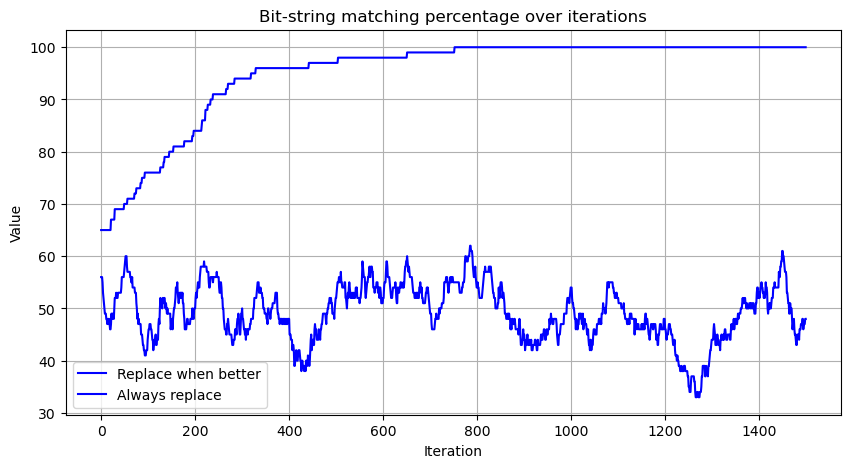

In [102]:
plt.figure(figsize=(10, 5))

l = 100
mu = 1/100
gens = 1500

goal_seq = generate_sequence_bits(l)
start_seq = generate_sequence_bits(l)

bits, scores = GE1(goal_seq, start_seq, gens, l, mu)
plot_scores(scores, label ="Replace when better")
l = 100
mu = 1/100
gens = 1500

goal_seq = generate_sequence_bits(l)
start_seq = generate_sequence_bits(l)

bits, scores = GE2(goal_seq, start_seq, gens, l, mu)
plot_scores(scores, label ="Always replace")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

repeat = 100

l = 100
mu = 1/100
gens = 1500

scores_total = []

for x in range(repeat):
    goal_seq = generate_sequence_bits(l)
    start_seq = generate_sequence_bits(l)

    bits, scores = GE1(goal_seq, start_seq, gens, l, mu)
    scores_total.append(scores)    

plot_scores(np.mean(scores_total, axis=0), label ="Replace when better")

l = 100
mu = 1/100
gens = 1500

scores_total = []

for x in range(repeat):    
    goal_seq = generate_sequence_bits(l)
    start_seq = generate_sequence_bits(l)

    bits, scores = GE2(goal_seq, start_seq, gens, l, mu)
    scores_total.append(scores)    
    
plot_scores(np.mean(scores_total, axis=0), label ="Always replace")

plt.show()